In [16]:
import pylhe
import math
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [3]:
def invariant_mass_one(p1):
    return math.sqrt(sum((1 if index=='e' else -1)*(getattr(p1,index))**2 for index in ['e','px','py','pz']))

def invariant_mass(p1,p2):
    return math.sqrt(sum((1 if index=='e' else -1)*(getattr(p1,index)+getattr(p2,index))**2 for index in ['e','px','py','pz']))



In [20]:
%%time

def Mhh(lhe_path: str):
    print("the file path is : {}".format(lhe_path))
    file = pylhe.readLHE(lhe_path)
    tmp_Mhh = []  

    for event in tqdm(file):
        tmp = []
        for i in range(len(event.particles)):
            if event.particles[i].id == 25:
                tmp.append(event.particles[i])
            
        tmp_Mhh.append(invariant_mass(tmp[0],tmp[1]))
    
    print("total events: {} ".format(len(tmp_Mhh)))
    tmp_Mhh = np.array(tmp_Mhh)

    return tmp_Mhh

gghh_M =Mhh(lhe_path = './higgspair_lhe/gghh.lhe')
ggHhh_M =Mhh(lhe_path = './higgspair_lhe/ggh2hh.lhe')
gghh_M_offshell =Mhh(lhe_path = './higgspair_lhe/gghh_offshell.lhe')

213it [00:00, 2117.63it/s]

the file path is : ./gghh.lhe


10000it [00:06, 1501.14it/s]
525it [00:00, 2614.86it/s]

total events: 10000 
the file path is : ./ggh2hh.lhe


10000it [00:05, 1671.65it/s]
546it [00:00, 2727.96it/s]

total events: 10000 
the file path is : ./gghh_offshell.lhe


10000it [00:06, 1568.73it/s]

total events: 10000 
CPU times: user 18.7 s, sys: 654 ms, total: 19.3 s
Wall time: 19 s


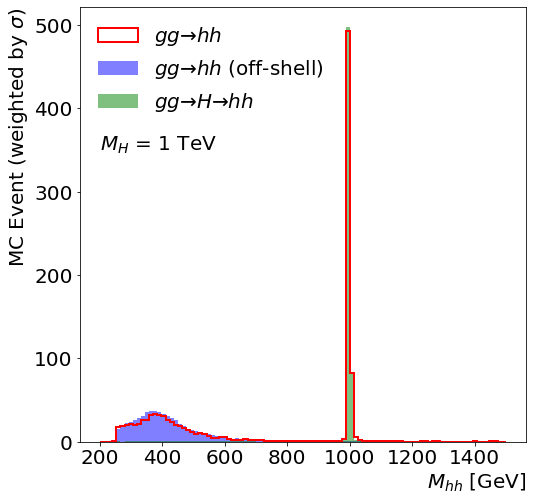

In [21]:
plt.figure(figsize=(8,8))

plt.hist(gghh_M,bins=np.linspace(200,1500,100), density=0, weights=np.full(10000,0.1096),histtype="step", color="red", linewidth=2, label="$gg \\to hh$")
plt.hist(gghh_M_offshell,bins=np.linspace(200,1500,100), density=0, weights=np.full(10000,0.06103), color="blue", alpha=0.5, label="$gg \\to hh$ (off-shell)")
plt.hist(ggHhh_M,bins=np.linspace(200,1500,100), density=0, weights=np.full(10000,0.06008), color="green", alpha=0.5, label="$gg \\to H \\to hh$")

plt.text(x=200, y=350, s="$M_H$ = 1 TeV", fontsize=20, rotation=0)

plt.xlabel("$M_{hh}}$ [GeV]" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("MC Event (weighted by $\sigma$)", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=20)   # set x-ticks size
plt.yticks(fontsize=20)
plt.legend(loc="best",ncol=1,fontsize=20, edgecolor = "w",fancybox=False, framealpha=0)
plt.show()